In [ ]:
#Questão 1
import numpy as np
import time

class MyArray:
    def __init__(self, lista=None):
        if lista is None:
            self.n = 0
            self.capacidade = 1
            self.array = np.empty(self.capacidade, dtype=object)
        else:
            self.n = len(lista)
            self.capacidade = len(lista)
            self.array = np.array(lista, dtype=object)

    def __str__(self):
        return "[" + ", ".join(repr(self.array[i]) for i in range(self.n)) + "]"

    def __len__(self):
        return self.n
    
    def _resize(self, new_cap):
        new_array = np.empty(new_cap, dtype=object)
        for i in range(self.n):
            new_array[i] = self.array[i]
        self.array = new_array
        self.capacidade = new_cap

    def __getitem__(self, index):
        index = index % self.n 
        return self.array[index]

    def append(self, item):
        if self.n == self.capacidade:
            self._resize(2 * self.capacidade)
        self.array[self.n] = item
        self.n += 1

    def pop(self):
        item = self.array[self.n - 1]
        self.array[self.n - 1] = None
        self.n -= 1
        return item
    
ini = time.perf_counter()
my_array = MyArray([1, 2, 3])
print(my_array)
my_array.append(4)
print(my_array)
print(my_array.pop())
print(my_array)
fim = time.perf_counter()
print(f"Tempo de execução: {fim - ini} segundos")

ini = time.perf_counter()
lista_padrao = [1, 2, 3]
print(lista_padrao)
lista_padrao.append(4)
print(lista_padrao)
print(lista_padrao.pop())
print(lista_padrao)
fim = time.perf_counter()
print(f"Tempo de execução: {fim - ini} segundos")

# --- Teste de Performance ---

num_elementos = 100000 # Vamos adicionar 100 mil elementos

print(f"--- Testando MyArray com {num_elementos} appends ---")
my_array = MyArray() # Começa vazio
ini_myarray = time.perf_counter()

# Loop para adicionar os elementos
for i in range(num_elementos):
    my_array.append(i)

fim_myarray = time.perf_counter()
duracao_myarray = fim_myarray - ini_myarray
print(f"Estado final: {my_array}") # Mostra tamanho e capacidade finais
print(f"Tempo de execução (MyArray): {duracao_myarray:.6f} segundos")

print("-" * 40)

print(f"--- Testando list padrão com {num_elementos} appends ---")
lista_padrao = [] # Começa vazia
ini_lista = time.perf_counter()

# Loop para adicionar os elementos
for i in range(num_elementos):
    lista_padrao.append(i)

fim_lista = time.perf_counter()
duracao_lista = fim_lista - ini_lista
# print(f"Estado final: {lista_padrao[:10]}... (Size={len(lista_padrao)})") # Lista padrão não tem capacidade visível
print(f"Tempo de execução (list): {duracao_lista:.6f} segundos")

print("-" * 40)

# Comparação
print("\n--- Comparação ---")
if duracao_myarray < duracao_lista:
    print(f"MyArray foi {duracao_lista / duracao_myarray:.2f} vezes mais rápido.")
else:
    print(f"list padrão foi {duracao_myarray / duracao_lista:.2f} vezes mais rápido.")

## Explicação:  
- Lista python é compilada em C e foi otimizada durante décadas, por isso é naturalmente mais rápida do que algo em python interpretado.

scipy version = 1.16.2
O ponto mais proximo está a 0.52 de distância, é o ponto (8.00,4.37)  no índice 68


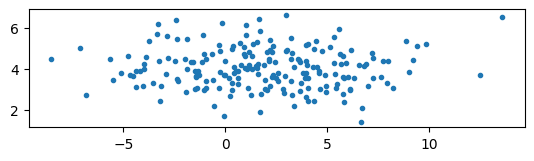

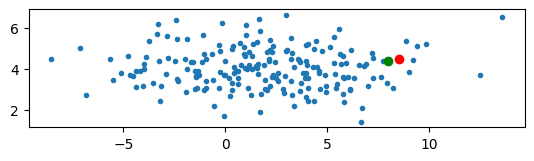

In [ ]:
#Questão 2 (função)

import scipy as sp
import numpy as np
print(f'scipy version = {sp.__version__}')
from matplotlib import pyplot as plt
np.random.seed(1001)
N = 200
normaldist1 = sp.stats.norm(2, 4)
normaldist2 = sp.stats.norm(4, 1)
X = normaldist1.rvs(N)
Y = normaldist2.rvs(N)
data  = np.array([X, Y]).T
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.')
ax.set_aspect('equal', 'box')

def find_nb(data, point):
    Dt = data - point
    d = np.linalg.norm(Dt, axis=1)
    idt = np.argmin(d)
    return d[idt], idt

point = np.array([8.5, 4.5])
dd, idx = find_nb(data, point)
print(f"O ponto mais proximo está a {dd:.2f} de distância, é o ponto ({data[idx,0]:.2f},{data[idx,1]:.2f})  no índice {idx}")

#plotagem
fig, ax = plt.subplots()
ax.plot(data[:,0], data[:,1], '.')
ax.plot(point[0], point[1], 'ro')
ax.plot(data[idx,0], data[idx,1], 'go')
ax.set_aspect('equal', 'box')
plt.show()


## Explicação:
- A função encontra o elemento mais proximo de um ponto dado dentro do conjunto de dados;
- Complexidade O(n), sendo n o números de pontos no conjunto de dados. Função linear que percorre cada elemento de data.

# Questão 3
__Números de ponto flutuante definidos por:__
- Base $\beta \geq 2$;
- precisão $p \geq 1$, ou seja, $p$ dígitos significativos na mantissa;
- expoente inteiro $e$ no intervalo $[e_{\min}, e_{\max}]$.
  
Número de ponto flutuante (não nulo), representado por:  
$$\pm d_0 \cdot d_1 d_2 ...d_{p-1} \times \beta^e,$$
- 0 representação própria
- $d_0 \in \{1 ,..., \beta - 1\}$
- $d_i \in \{0, ..., \beta - 1 \} \text{    para } i \geq 1$
- $e_{\min} \leq e \leq e_{max}.$

## Resposta:
Para representar N itens distintos, o número mínimo de bits que precisamos é o teto do logaritmo de N na base 2.
$$ \text{Bits} = \lceil\log_2(N) \rceil$$
Agora buscamos o N: $N =$ (Números não nulos) + $1$ (para o 0)
  
Como um número não nulo é definido por "$\pm d_0 \cdot d_1 d_2 ...d_{p-1} \times \beta^e$", contamos quantas possibilidades temos para cada 'casa':
- 1 para cada sinal = 2
- de $d_0$ a $d_{p-1}$ na mantissa, são p dígitos na base $\beta$. Para $d_0$ são ($\beta -1$) e para os outros $p-1$ são $\beta$. Logo, $(\beta -1) \times \beta^{(p-1)}$ possibilidades
- excolhas para expoente no intervalo $[ e_{\max}, e_{\min} ] = e_{\max} - e_{\min} + 1$
  
Juntando:
$$N =[2 \times (\beta -1) \times \beta^{(p-1)} \times (e_{\max} - e_{\min} + 1)] + 1$$
$$ \text{Bits } = \lceil \log_2([2 \times (\beta -1) \times \beta^{(p-1)} \times (e_{\max} - e_{\min} + 1)] + 1)\rceil$$

In [22]:
#Questão 4
def acha_epsilon(n):
    n = float(n)
    E = n
    while E + n != n:
        E /= 2
    return E * 2

epsilon1 = acha_epsilon(1)

print(f'Epsilon da máquina em torno de 1: {epsilon1}')

import sys
print(f'Vendo pelo sys: {sys.float_info.epsilon}')

Epsilon da máquina em torno de 1: 2.220446049250313e-16
Vendo pelo sys: 2.220446049250313e-16


In [24]:
#Questão 5
#(rodar bloco anterior)

epsilon2 = acha_epsilon(10**6)

print(f'Epsilon da máquina em torno de 10^6: {epsilon2}')

#item a)
print(f'Epsilon para 10^6 é {(epsilon2/epsilon1):.1e} vezes maior que para 1')

#item c)
print(f'Para 10^18, por exemplo: {acha_epsilon(10**18)}')

Epsilon da máquina em torno de 10^6: 1.1102230246251565e-10
Epsilon para 10^6 é 5.0e+05 vezes maior que para 1
Para 10^18, por exemplo: 111.02230246251565


__b)__
* O epsilon ($2.22 \times 10^{-16}$) é o espaçamento para números com expoente $e=0$ (também representado por $2^{-52}$).
* O número $10^6$ (1 milhão) está entre $2^{19}$ (que é 524.288) e $2^{20}$ (que é 1.048.576).
* Como $10^6$ está nesse intervalo, o sistema de ponto flutuante o armazena usando o expoente **$e=19$**.
* Portanto, o espaçamento para qualquer número nessa faixa é $2^{19} \approx 500000 $ vezes maior do que o espaçamento na faixa de $e=0$.

__c)__
* Para números muito grandes, o valor mínimo para ocorrer uma modificação do numero float é significativo. Por exemplo:
    * para epsilon em $10^{18} = 128.0$, isso quer dizer que o valor mínimo para ocorrer a alteração é 128.
    * Caso eu some $10^{18} + 100$ o resultado será $10^{18}$ ainda.
  
* Para números muito pequenos, o float pode sofrer de underflow, onde a máquina não consegue representar o número. Por exemplo:
    * para epsilon em $10^{-350}$, seria abaixo do $e_{\min} = -1022$
    * calculando o epsilon mínimo: $2^{-52} \times 2^{1022} = 2^{1074} \approx 5 \times 10^{-324}$ que é maior que $-350$. Por isso, $10^{-350}$ teria representação em $0.0$